In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# Function to read data from file
def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            point = line.split()
            data.append([float(point[0]), float(point[1])])
    return np.array(data)
# Read data from files
class1 = read_data('Class1.txt')
class2 = read_data('Class2.txt')
class3 = read_data('Class3.txt')
print(class1[:10])
print(class2[:10])
print(class3[:10])

[[ 320.3125  1492.1875 ]
 [ 265.625   2335.9375 ]
 [ 285.15625 2281.25   ]
 [ 238.28125 2402.34375]
 [ 261.71875 2343.75   ]
 [ 230.46875 1820.3125 ]
 [ 277.34375 1886.71875]
 [ 265.625   2378.90625]
 [ 296.875   2378.90625]
 [ 289.0625  1898.4375 ]]
[[ 339.84375  804.6875 ]
 [ 347.65625  687.5    ]
 [ 398.4375  1265.625  ]
 [ 367.1875   667.96875]
 [ 390.625    667.96875]
 [ 386.71875  738.28125]
 [ 394.53125  707.03125]
 [ 398.4375   718.75   ]
 [ 398.4375   730.46875]
 [ 410.15625  730.46875]]
[[328.125   734.375  ]
 [261.71875 730.46875]
 [300.78125 667.96875]
 [324.21875 691.40625]
 [320.3125  625.     ]
 [347.65625 714.84375]
 [296.875   648.4375 ]
 [300.78125 703.125  ]
 [312.5     679.6875 ]
 [363.28125 761.71875]]


In [11]:
def manual_train_test_split(data, train_size=0.7):
    np.random.shuffle(data)
    split_index = int(train_size * len(data))
    return data[:split_index], data[split_index:]
train_data1, test_data1 = manual_train_test_split(class1)
train_data2, test_data2 = manual_train_test_split(class2)
train_data3, test_data3 = manual_train_test_split(class3)

# Combine data from all classes
train_data = np.vstack((train_data1, train_data2, train_data3))
train_labels = np.array([0]*len(train_data1) + [1]*len(train_data2) + [2]*len(train_data3))

test_data = np.vstack((test_data1, test_data2, test_data3))
test_labels = np.array([0]*len(test_data1) + [1]*len(test_data2) + [2]*len(test_data3))
print("Train Data is:")
print(train_data[:10])
print("Test Data is:")     
print(test_data[:10])

Train Data is:
[[ 300.78125 2277.34375]
 [ 261.71875 2347.65625]
 [ 347.65625 2222.65625]
 [ 246.09375 2261.71875]
 [ 304.6875  2195.3125 ]
 [ 296.875   2265.625  ]
 [ 312.5     2269.53125]
 [ 242.1875  1988.28125]
 [ 312.5     2324.21875]
 [ 320.3125  2269.53125]]
Test Data is:
[[ 292.96875 2273.4375 ]
 [ 316.40625 2273.4375 ]
 [ 343.75    2171.875  ]
 [ 308.59375 2261.71875]
 [ 257.8125  2339.84375]
 [ 382.8125  2203.125  ]
 [ 289.0625  2273.4375 ]
 [ 339.84375 2191.40625]
 [ 281.25    2222.65625]
 [ 300.78125 2226.5625 ]]


In [12]:
def compute_mean_cov(data):
    return np.mean(data, axis=0), np.cov(data.T)

mean1, cov1 = compute_mean_cov(train_data[train_labels == 0])
mean2, cov2 = compute_mean_cov(train_data[train_labels == 1])
mean3, cov3 = compute_mean_cov(train_data[train_labels == 2])
print(mean1,mean2,mean3)
print(cov1,cov2,cov3)
meanarr=np.array([mean1,mean2,mean3])

[ 313.10545706 2278.46583259] [483.95639196 851.14844205] [359.05190982 751.69173607]
[[13140.45665787 -1176.73038838]
 [-1176.73038838  9260.95305567]] [[ 8146.93319225  5232.19516473]
 [ 5232.19516473 12401.40037458]] [[3575.25783498 3006.61603694]
 [3006.61603694 7350.52222185]]


In [13]:
def gaussian_density(x, mean, cov):
    d = x - mean
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    exponent = -0.5 * np.dot(np.dot(d.T, inv_cov), d)
    normalization = 1.0 / (2 * np.pi * np.sqrt(det_cov))
    return normalization * np.exp(exponent)

# Posterior probability function
def posterior_probability(x, mean, cov, prior):
    likelihood = gaussian_density(x, mean, cov)
    posterior = likelihood * prior
    return posterior

# Classify based on posterior probability
def classify_2(x,mean1,mean2,cov1,cov2,priors):
    post_class1 = posterior_probability(x, mean1, cov1, priors[0])
    post_class2 = posterior_probability(x, mean2, cov2, priors[1])
    return np.argmax([post_class1, post_class2])
def classify(x, mean1, mean2, mean3, cov1,cov2,cov3, priors):
    post_class1 = posterior_probability(x, mean1, cov1, priors[0])
    post_class2 = posterior_probability(x, mean2, cov2, priors[1])
    post_class3 = posterior_probability(x, mean3, cov3, priors[2])
    return np.argmax([post_class1, post_class2, post_class3])


In [14]:
priors = np.array([len(train_data1), len(train_data2), len(train_data3)]) / len(train_data)

In [15]:
def confusion_matrix(true_labels, predictions, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(true_labels, predictions):
        cm[true, pred] += 1
    return cm

def accuracy_score(true_labels, predictions):
    return np.mean(np.array(true_labels) == np.array(predictions))

def precision_score(true_labels, predictions, num_classes):
    cm = confusion_matrix(true_labels, predictions, num_classes)
    precision = np.diag(cm) / np.sum(cm, axis=0)
    return np.nan_to_num(precision)  # Convert NaN to 0

def recall_score(true_labels, predictions, num_classes):
    cm = confusion_matrix(true_labels, predictions, num_classes)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    return np.nan_to_num(recall)  # Convert NaN to 0

def f1_score(true_labels, predictions, num_classes):
    precision = precision_score(true_labels, predictions, num_classes)
    recall = recall_score(true_labels, predictions, num_classes)
    f1 = 2 * (precision * recall) / (precision + recall)
    return np.nan_to_num(f1)  # Convert NaN to 0

def compute_metrics(true_labels, predictions, num_classes):
    cm = confusion_matrix(true_labels, predictions, num_classes)
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, num_classes)
    mean_precision = np.mean(precision)
    recall = recall_score(true_labels, predictions, num_classes)
    mean_recall = np.mean(recall)
    f1 = f1_score(true_labels, predictions, num_classes)
    mean_f1 = np.mean(f1)

    return cm, accuracy, precision, mean_precision, recall, mean_recall, f1, mean_f1
def print_metrics(title, metrics):
    cm, accuracy, precision, mean_precision, recall, mean_recall, f1, mean_f1 = metrics
    print(f"{title}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Mean Precision: {mean_precision}")
    print(f"Recall: {recall}")
    print(f"Mean Recall: {mean_recall}")
    print(f"F-measure: {f1}")
    print(f"Mean F-measure: {mean_f1}\n")   

In [16]:
def plot_decision_region(train_data, train_labels, classifier, title, priors):
    # Define grid limits
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 8), np.arange(y_min, y_max, 8))

    # Apply classifier over the grid points
    Z = np.array([classifier(np.array([x, y]), priors) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Scatter plot for training data
    scatter = plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolor='k')

    # Add title and axis labels
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Add a legend using scatter.legend_elements()
    legend1 = plt.legend(handles=scatter.legend_elements()[0], 
                         labels=[str(label) for label in np.unique(train_labels)],  # Convert labels to strings
                         title="Classes", loc="upper right")

    plt.show()
def plot_decision_region_2(train_data, train_labels, classifier, mean1, mean2,title,priors,class_pair):
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 8), np.arange(y_min, y_max, 8))

    # Apply classifier over the grid points
    Z = np.array([classifier(np.array([x, y]), mean1, mean2, priors) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Scatter plot for training data
    scatter = plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolor='k')

    # Add title and axis labels
    plt.title(title)
    plt.xlabel('Class ' + str(class_pair[0]))
    plt.ylabel('Class ' + str(class_pair[1]))

    # Add legend using scatter.legend_elements()
    legend1 = plt.legend(handles=scatter.legend_elements()[0], 
                         labels=['Class ' + str(class_pair[0]), 'Class ' + str(class_pair[1])],
                         loc="upper right")

    plt.show()
def plot_contour(train_data, train_labels, means, covs, title):
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 8), np.arange(y_min, y_max, 8))

    plt.figure(figsize=(8, 6))

    # Plot contours for each class
    for mean, cov in zip(means, covs):
        Z = np.array([gaussian_density(np.array([x, y]), mean, cov) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=5, alpha=0.75)

    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def pairdata(train_data,train_labels,class_pair):
    class1, class2 = class_pair
    pair_data = train_data[(train_labels == class1) | (train_labels == class2)]
    pair_labels = train_labels[(train_labels == class1) | (train_labels == class2)]
    pair_labels[pair_labels == class1] = 0
    pair_labels[pair_labels == class2] = 1
    return [pair_data,pair_labels]


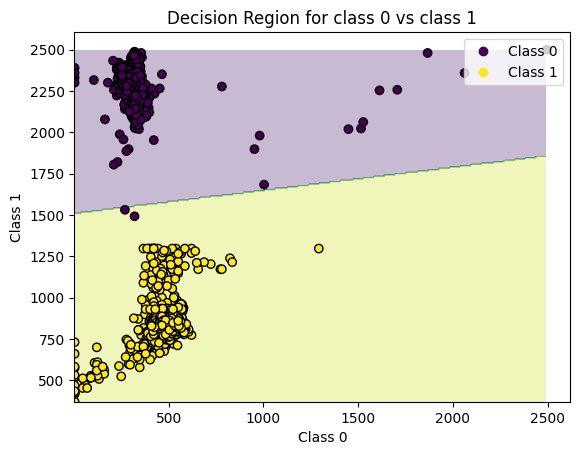

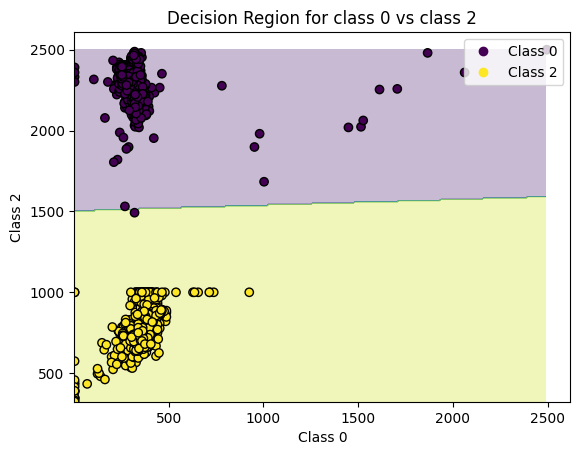

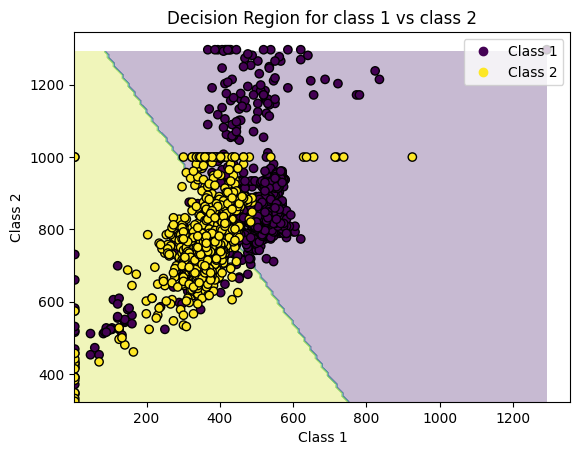

In [17]:
# Implement classifiers
sigma_squared = (cov1 + cov2 + cov3) / 3
sigma_squared_identity = np.diag(np.diag(sigma_squared))

def classifier_sigma_squared_identity(x, priors):
    return classify(x, mean1, mean2, mean3, sigma_squared_identity,sigma_squared_identity,sigma_squared_identity, priors)
def classifier_sigma_squared_identity_2(x,mean1,mean2,priors):
    return classify_2(x, mean1, mean2,sigma_squared_identity,sigma_squared_identity,priors)    
    
class_pairs=[(0,1),(0,2),(1,2)]
for i in class_pairs:
    pair_data,pair_labels=pairdata(train_data,train_labels,i)
    m1,m2=meanarr[i[0]],meanarr[i[1]]
    title=f'Decision Region for class {i[0]} vs class {i[1]}'
    plot_decision_region_2(pair_data,pair_labels,classifier_sigma_squared_identity_2,m1,m2,title,[0.5,0.5],i)

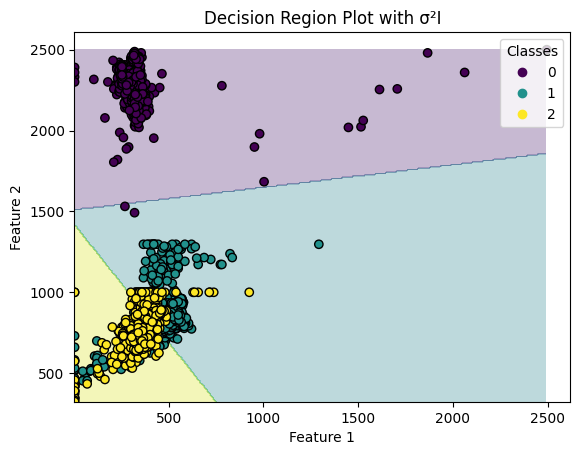

In [18]:
#DECISION REGION FOR ALL THE CLASSES
plot_decision_region(train_data, train_labels, classifier_sigma_squared_identity, "Decision Region Plot with σ²I",priors)

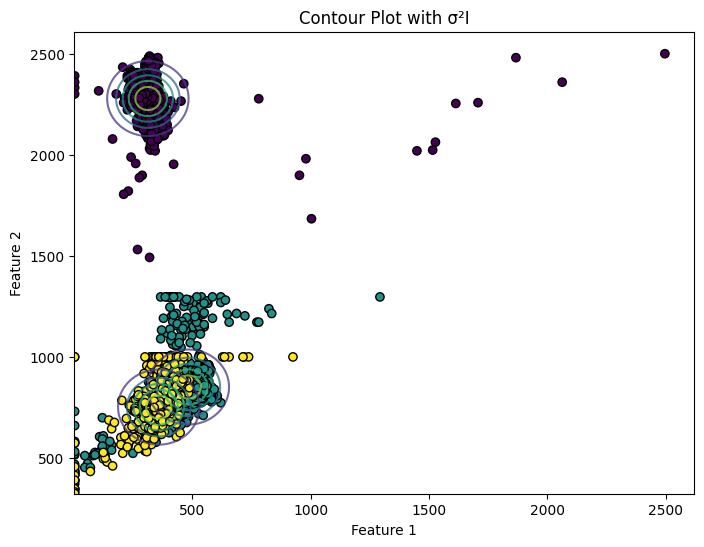

In [19]:

plot_contour(train_data, train_labels, [mean1, mean2, mean3], [sigma_squared_identity]*3, "Contour Plot with σ²I")

In [20]:
predictions_sigma_squared_identity = np.array([classifier_sigma_squared_identity(x, priors) for x in test_data])
metrics_sigma_squared_identity = compute_metrics(test_labels, predictions_sigma_squared_identity, 3)
print_metrics("Classifier with σ²I", metrics_sigma_squared_identity)

Classifier with σ²I
Confusion Matrix:
[[715   0   2]
 [  0 656  81]
 [  0 121 626]]
Accuracy: 0.9073148568832349
Precision: [1.         0.84427284 0.88293371]
Mean Precision: 0.9090688512409245
Recall: [0.9972106  0.89009498 0.83801874]
Mean Recall: 0.9084414403338258
F-measure: [0.99860335 0.8665786  0.85989011]
Mean F-measure: 0.9083573538604055



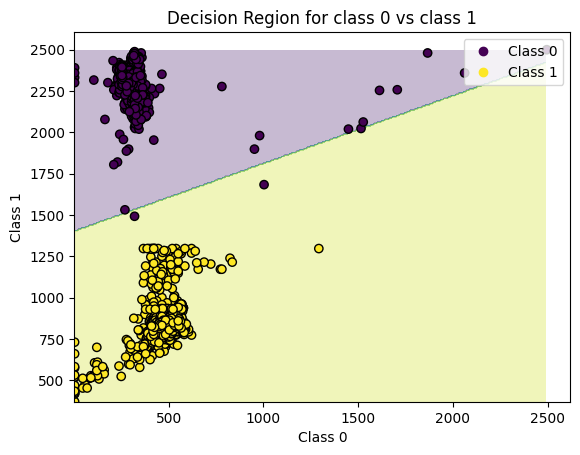

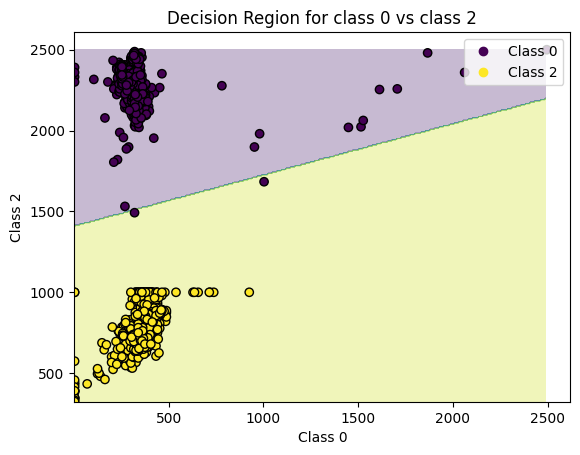

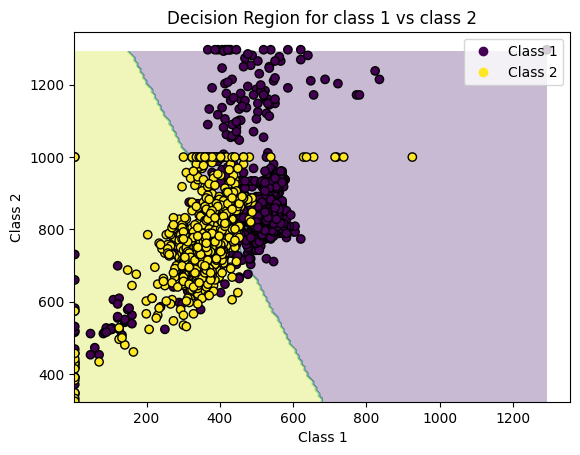

In [21]:
#Full covariasnce
cov_avg = (cov1 + cov2 + cov3) / 3
def classifier_full_covariance(x, priors):
    return classify(x, mean1, mean2, mean3, cov_avg,cov_avg,cov_avg, priors)
def classifier_full_covariance_2(x,mean1,mean2,priors):
    return classify_2(x, mean1, mean2,cov_avg,cov_avg,priors)    
class_pairs=[(0,1),(0,2),(1,2)]
for i in class_pairs:
    pair_data,pair_labels=pairdata(train_data,train_labels,i)
    m1,m2=meanarr[i[0]],meanarr[i[1]]
    title=f'Decision Region for class {i[0]} vs class {i[1]}'
    plot_decision_region_2(pair_data,pair_labels,classifier_full_covariance_2,m1,m2,title,[0.5,0.5],i)

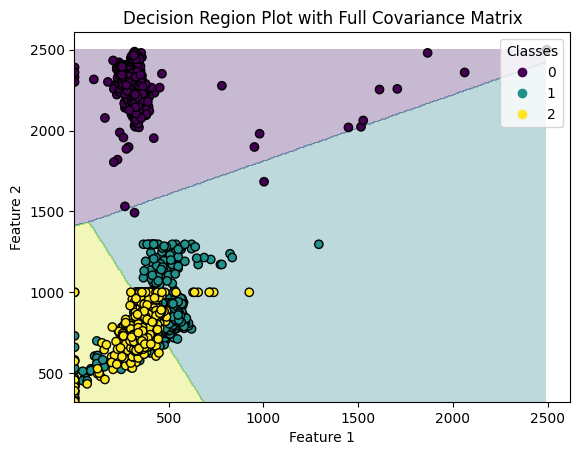

In [22]:
#decision for all classes using full covariance
plot_decision_region(train_data, train_labels, classifier_full_covariance, "Decision Region Plot with Full Covariance Matrix",priors)

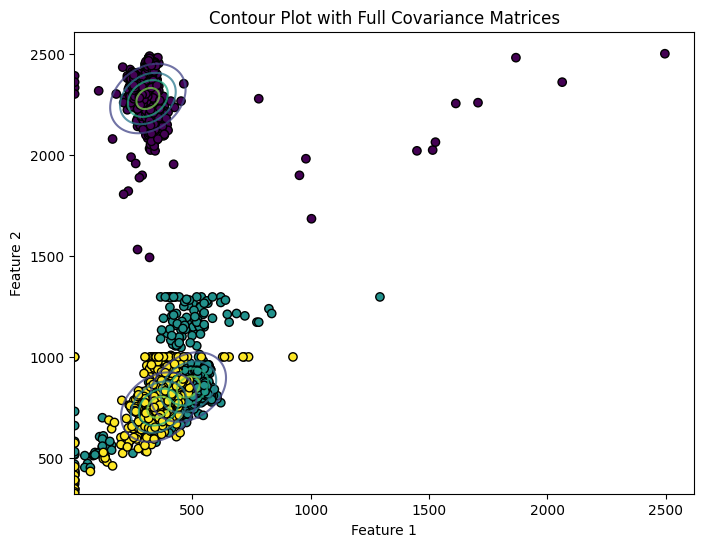

In [23]:
#Contour for all 3 classes using full covariance
plot_contour(train_data, train_labels, [mean1, mean2, mean3], [cov_avg]*3, "Contour Plot with Full Covariance Matrices")

In [24]:
predictions_full_covariance = np.array([classifier_full_covariance(x, priors) for x in test_data])
metrics_full_covariance = compute_metrics(test_labels, predictions_full_covariance, 3)
print_metrics("Classifier with Full Covariance Matrix Σ", metrics_full_covariance)

Classifier with Full Covariance Matrix Σ
Confusion Matrix:
[[715   0   2]
 [  0 657  80]
 [  0 116 631]]
Accuracy: 0.9100408905043162
Precision: [1.         0.84993532 0.88499299]
Mean Precision: 0.9116427681080795
Recall: [0.9972106  0.89145183 0.84471218]
Mean Recall: 0.9111248711776595
F-measure: [0.99860335 0.87019868 0.86438356]
Mean F-measure: 0.9110618630319439



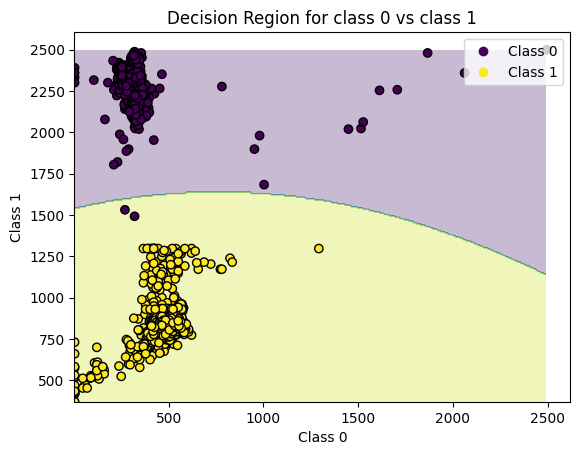

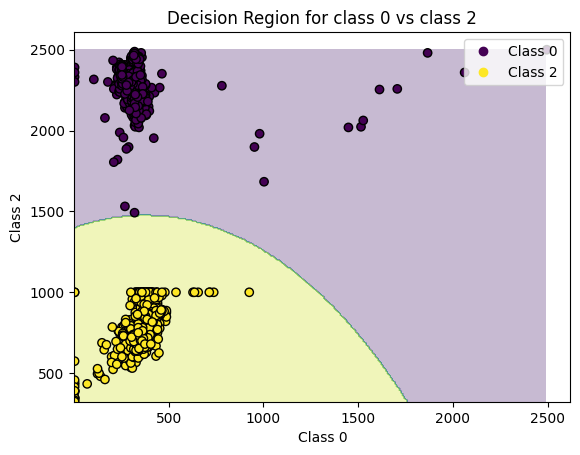

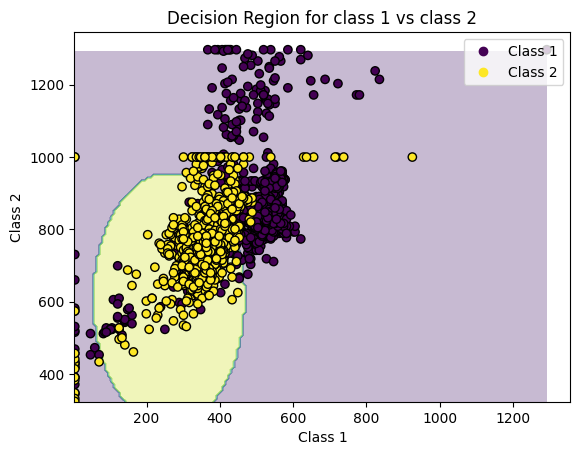

In [25]:
diag_cov1 = np.diag(np.diag(cov1))
diag_cov2 = np.diag(np.diag(cov2))
diag_cov3 = np.diag(np.diag(cov3))
diagcovarr=np.array([diag_cov1,diag_cov2,diag_cov3])
def classifier_diag_covariance(x, priors):
    return classify(x, mean1, mean2, mean3, diag_cov1, diag_cov2, diag_cov3, priors)  
def classifier_diag_covariance_2(x,mean1,mean2,priors):
    cov1,cov2= diagcovarr[np.where(meanarr == mean1)[0][0]] , diagcovarr[np.where(meanarr == mean2)[0][0]]
    return classify_2(x, mean1, mean2,cov1,cov2,priors)    
class_pairs=[(0,1),(0,2),(1,2)]
for i in class_pairs:
    pair_data,pair_labels=pairdata(train_data,train_labels,i)
    m1,m2=meanarr[i[0]],meanarr[i[1]]
    title=f'Decision Region for class {i[0]} vs class {i[1]}'
    plot_decision_region_2(pair_data,pair_labels,classifier_diag_covariance_2,m1,m2,title,[0.5,0.5],i)

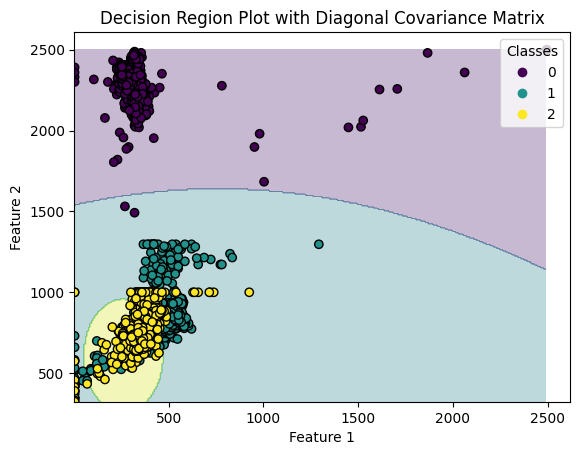

In [26]:
#decision for all classes using diagonal covariance
plot_decision_region(train_data, train_labels, classifier_diag_covariance, "Decision Region Plot with Diagonal Covariance Matrix",priors)

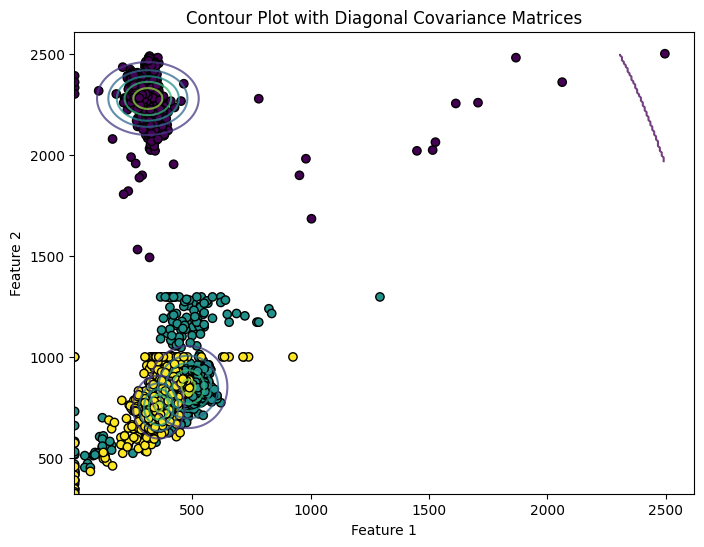

In [27]:
#contour plot for diagonal covariance matrix
plot_contour(train_data, train_labels, [mean1, mean2, mean3], [diag_cov1, diag_cov2, diag_cov3], "Contour Plot with Diagonal Covariance Matrices")

In [28]:
predictions_diag_covariance = np.array([classifier_diag_covariance(x, priors) for x in test_data])
metrics_diag_covariance = compute_metrics(test_labels, predictions_diag_covariance, 3)
print_metrics("Classifier with Diagonal Covariance Matrix", metrics_diag_covariance)

Classifier with Diagonal Covariance Matrix
Confusion Matrix:
[[715   1   1]
 [  0 648  89]
 [  0  98 649]]
Accuracy: 0.9141299409359382
Precision: [1.         0.86746988 0.8782138 ]
Mean Precision: 0.9152278939845987
Recall: [0.9972106  0.87924016 0.86880857]
Mean Recall: 0.9150864433823536
F-measure: [0.99860335 0.87331536 0.87348587]
Mean F-measure: 0.9151348613129991



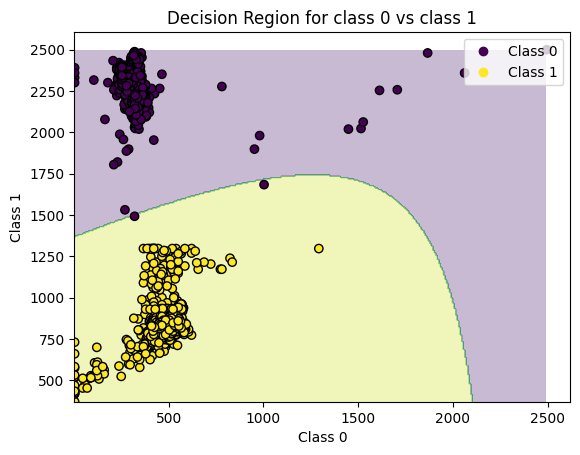

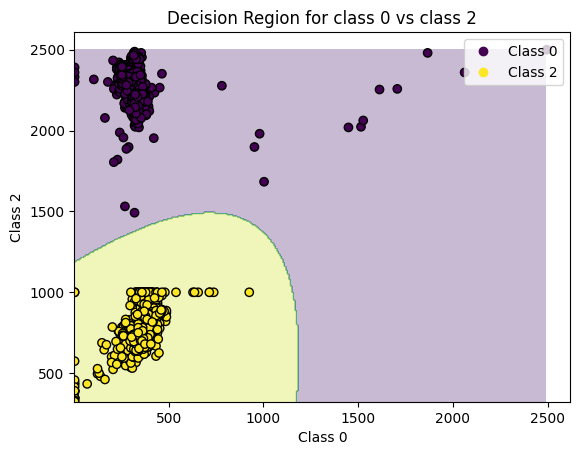

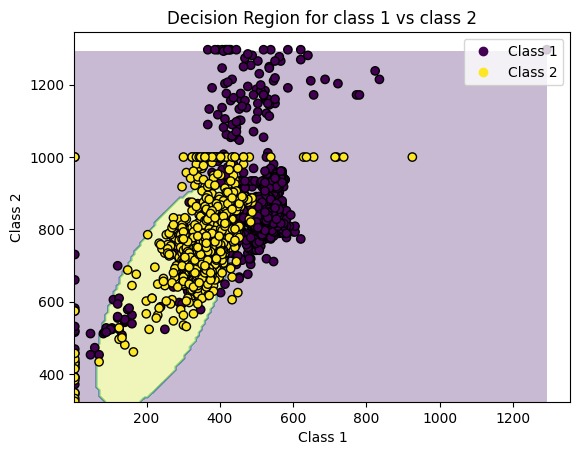

In [29]:
covarr=np.array([cov1,cov2,cov3])
def classifier_full_covariance_per_class(x, priors):
    return classify(x, mean1, mean2, mean3, cov1, cov2, cov3, priors)  
def classifier_full_covariance_per_class_2(x,mean1,mean2,priors):
    cov1,cov2= covarr[np.where(meanarr == mean1)[0][0]] ,covarr[np.where(meanarr == mean2)[0][0]]
    return classify_2(x, mean1, mean2,cov1,cov2,priors)    
class_pairs=[(0,1),(0,2),(1,2)]
for i in class_pairs:
    pair_data,pair_labels=pairdata(train_data,train_labels,i)
    m1,m2=meanarr[i[0]],meanarr[i[1]]
    title=f'Decision Region for class {i[0]} vs class {i[1]}'
    plot_decision_region_2(pair_data,pair_labels,classifier_full_covariance_per_class_2,m1,m2,title,[0.5,0.5],i)

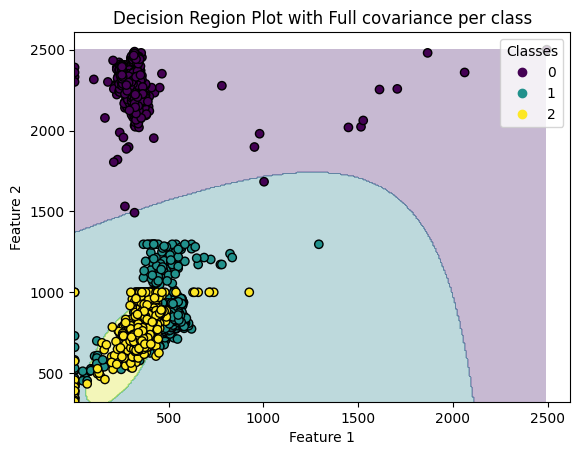

In [30]:
plot_decision_region(train_data, train_labels, classifier_full_covariance_per_class, "Decision Region Plot with Full covariance per class",priors)

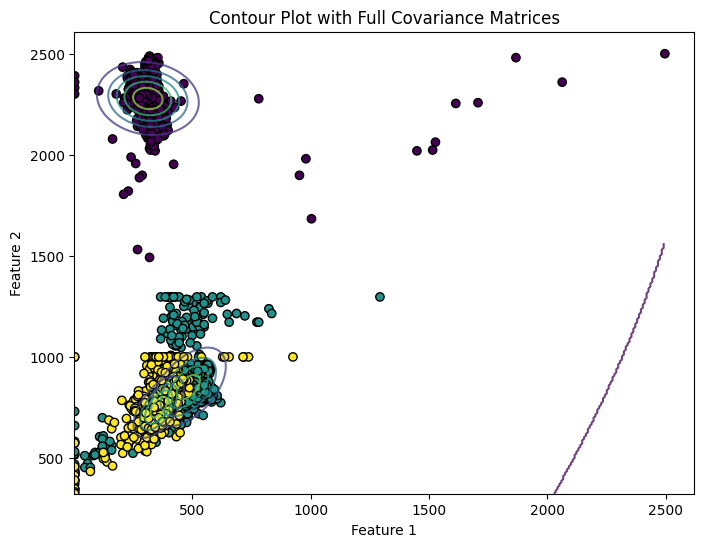

In [31]:
#contour plot full covariance per class
plot_contour(train_data, train_labels, [mean1, mean2, mean3], [cov1, cov2, cov3], "Contour Plot with Full Covariance Matrices")

In [32]:
predictions_full_covariance_per_class = np.array([classifier_full_covariance_per_class(x, priors) for x in test_data])
metrics_full_covariance_per_class = compute_metrics(test_labels, predictions_full_covariance_per_class, 3)
print_metrics("Classifier with Full Covariance Matrix per Class", metrics_full_covariance_per_class)

Classifier with Full Covariance Matrix per Class
Confusion Matrix:
[[715   1   1]
 [  0 629 108]
 [  0  87 660]]
Accuracy: 0.9104952294411631
Precision: [1.         0.87726639 0.85825748]
Mean Precision: 0.9118412883232706
Recall: [0.9972106  0.85345997 0.88353414]
Mean Recall: 0.9114015697100676
F-measure: [0.99860335 0.86519945 0.8707124 ]
Mean F-measure: 0.9115050676014631

